<a href="https://colab.research.google.com/github/elinahlyva-dataanalytics/data-analytics-portfolio/blob/main/titanic_passagier_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

========= TITANIC PROJEKT – Analyse historischer Passagierdaten ==========

Zu Beginn wird Google Colab mit Google Drive verbunden, anschließend werden die benötigten Bibliotheken in Python importiert

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Datensatz aus der Bibliothek Seaborn geladen

In [29]:
titanic=sns.load_dataset('titanic')
print(f"Кількість рядків після завантаження датасету:{titanic.shape[0]}")

Кількість рядків після завантаження датасету:891


2. Die ersten Zeilen des Datensatzes überprüft, um sicherzustellen, dass der Import korrekt erfolgt ist

In [30]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
titanic[(titanic['sibsp'] + titanic['parch'])>5] # Schauen wir uns an, wo die Gesamtanzahl der Familienmitglieder mehr als 5 beträgt
#titanic['relatives_count']=titanic['sibsp'] + titanic['parch'] # numerische Werte der Spalten für weitere Berechnungen

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
13,0,3,male,39.0,1,5,31.2750,S,Third,man,True,NaN,Southampton,no,False
25,1,3,female,38.0,1,5,31.3875,S,Third,woman,False,NaN,Southampton,yes,False
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
68,1,3,female,17.0,4,2,7.9250,S,Third,woman,False,NaN,Southampton,yes,False
71,0,3,female,16.0,5,2,46.9000,S,Third,woman,False,NaN,Southampton,no,False
119,0,3,female,2.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
159,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
180,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
182,0,3,male,9.0,4,2,31.3875,S,Third,child,False,NaN,Southampton,no,False
201,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False


3. Datentypen der Spalten analysiert und Spalten identifiziert, die eine Anpassung der Formatierung benötigen

In [32]:
titanic.info() # Die Spalten "sex", "embarked", "embark_town", "class", "who" und "alive" können in den Datentyp 'category' umgewandelt werden, da sie nur wenige eindeutige Werte enthalten und damit keine mathematischen Berechnungen durchgeführt werden.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


4. Statistik zu jeder Spalte des Datasets überprüfen

In [33]:
titanic.describe() # zeigt Statistik für numerische Spalten (int64, float64), was für diese Spalten sinnvoll ist

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [34]:
titanic.describe(include=['object', 'category', 'bool'])

# Zeigt Statistik für nicht-numerische Werte an. Zum Beispiel nehmen wir die Spalte "alive" – hier wird sofort ersichtlich, dass es zwei Kategorien gibt:
# Überlebende und Verstorbene. Die Mehrheit der Passagiere ist gestorben (s. unter top).
# Laut der Daten handelt es sich dabei um 549 Personen (freq) von insgesamt 891 an Bord.
# Der Wert "freq" zeigt, wie häufig die häufigste (top) Kategorie vorkommt.

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


In [35]:
titanic.isna().sum() # Gibt die Anzahl der fehlenden Werte pro Spalte aus. Die meisten Angaben fehlen in den Spalten "age" und "deck"

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


5. Prüfen, ob Duplikate vorhanden sind. Zeilenanzahl vor und nach der Entfernung verglichen, doppelte Einträge entfernt und die Differenz als Anzahl der Duplikate berechnet.

In [36]:
rows_total = titanic.shape[0] # Gesamtanzahl der Zeilen definieren
titanic_cleaned = titanic.drop_duplicates() # Duplikate entfernen
rows_total_cleaned = titanic_cleaned.shape[0] # Zeilenanzahl nach dem Entfernen der Duplikate
duplicates_total = rows_total - rows_total_cleaned # Differenz berechnen = Anzahl der entfernten Duplikate

print(f"Gesamtanzahl der Zeilen: {rows_total}")
print(f"Anzahl der Zeilen nach dem Entfernen der Duplikate: {rows_total_cleaned}")
print(f"Anzahl der entfernten Duplikate: {duplicates_total}")

titanic = titanic_cleaned.copy() # den ursprünglichen Datensatz durch die bereinigte Version ersetzen und mit Kopie weiterarbeiten

Gesamtanzahl der Zeilen: 891
Anzahl der Zeilen nach dem Entfernen der Duplikate: 784
Anzahl der entfernten Duplikate: 107


6. Neue Spalte erstellt, die die Gesamtanzahl der Familienangehörigen an Bord zusammenfasst – basierend auf den ursprünglichen Spalten:
Anzahl Geschwister/Ehepartner, Anzahl Eltern/Kinder. Für Alleinreisende - Spalte mit bool Merkmal Trau/False einbauen. Anschließend wurden die ursprünglichen Spalten entfernt.

In [37]:
titanic['relatives_count']=titanic['sibsp'] + titanic['parch'] # neue Spalte 'relatives_count' erstellen, die die Werte aus den Spalten 'sibsp' und 'parch' summiert
#titanic['relatives']= titanic['relatives'].apply(lambda x: False if x ==0 else True) # Erste Methode: Bedingung für die Spalte 'relatives' festlegen (True/False)
titanic['no_relatives'] = titanic['relatives_count'] ==0 # zweite Methode zur Erstellung einer booleschen Spalte, die angibt, ob jemand ohne Familienmitglieder (als Alleinreisender) gereist ist
titanic.drop (columns=['sibsp','parch', 'alone'], inplace=True) # nicht mehr benötigte Spalten entfernen

In [38]:
titanic.head(5) # Überprüfen, ob die drei Spalten tatsächlich gelöscht wurden: 'sibsp', 'parch', 'alone'

,survived,pclass,sex,age,fare,embarked,class,who,adult_male,deck,embark_town,alive,relatives_count,no_relatives
0,0,3,male,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,1,False
1,1,1,female,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,1,False
2,1,3,female,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,0,True
3,1,1,female,35.0,53.1000,S,First,woman,False,C,Southampton,yes,1,False
4,0,3,male,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,0,True


In [39]:
titanic.info() #  Überprüfen, ob die drei Spalten ('sibsp', 'parch', 'alone') tatsächlich gelöscht und eine neue Spalte "relatives" mit Formatierung 'bool' erstellt wurde

<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   survived         784 non-null    int64   
 1   pclass           784 non-null    int64   
 2   sex              784 non-null    object  
 3   age              678 non-null    float64 
 4   fare             784 non-null    float64 
 5   embarked         782 non-null    object  
 6   class            784 non-null    category
 7   who              784 non-null    object  
 8   adult_male       784 non-null    bool    
 9   deck             202 non-null    category
 10  embark_town      782 non-null    object  
 11  alive            784 non-null    object  
 12  relatives_count  784 non-null    int64   
 13  no_relatives     784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(5)
memory usage: 70.9+ KB


7. Häufigkeitsverteilung der neuen Spalte (Familienanzahl) visualisiert mithilfe von sns.countplot

/tmp/ipython-input-3036782763.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='relatives_count', palette='viridis')


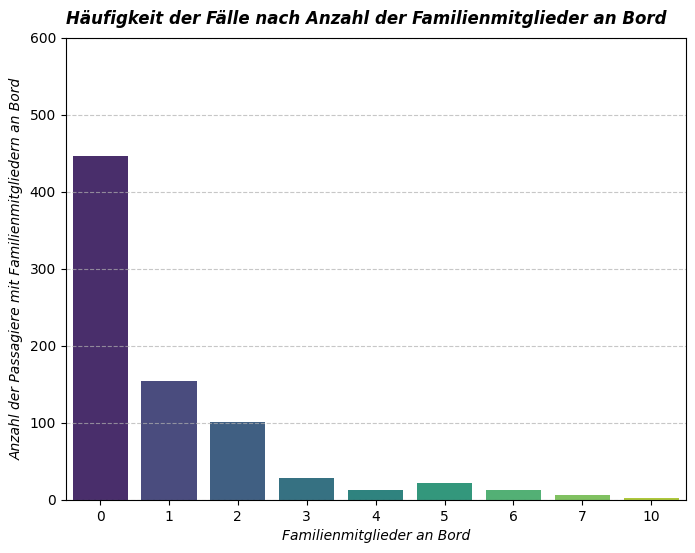

In [40]:
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='relatives_count', palette='viridis')

plt.title('Häufigkeit der Fälle nach Anzahl der Familienmitglieder an Bord', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)
plt.xlabel('Familienmitglieder an Bord', fontstyle='italic')
plt.ylabel('Anzahl der Passagiere mit Familienmitgliedern an Bord', fontstyle='italic')
plt.ylim(0, 600) # Y-Achsenbereich anpassen für bessere Lesbarkeit
plt.grid(axis='y', linestyle='--', alpha=0.7) # Gitterlinien entlang der Y-Achse hinzufügen

plt.show()

8. Werte über 5 Familienmitglieder mithilfe einer Lambda-Funktion durch die Kategorie „above 5“ ersetzt.

In [41]:
titanic['relatives_count'] = titanic['relatives_count'].apply(lambda x: 'above 5' if x > 5 else x)

In [42]:
titanic['relatives_count'].value_counts() # überprüfen, ob die Änderungen in der Spalte 'relatives_count' übernommen wurden

,count
relatives_count,
0,446
1,154
2,101
3,28
5,22
above 5,20
4,13


9. Die Spalte 'relatives_count' als Datenformat 'category' formatiert. Danach eine statistische Übersicht der modifizierten Spalte erstellt

In [43]:
titanic['relatives_count']=titanic['relatives_count'].astype('category')
titanic['relatives_count'].describe()

# count – zeigt die Anzahl der NICHT-leeren Werte,
# unique – 7 einzigartige Kategorien,
# top – der am häufigsten vorkommende Wert ist "0",
# freq – dieser Wert ("0") tritt 446 Mal auf


,relatives_count
count,784
unique,7
top,0
freq,446


10. Fehlende Altersangaben durch den Medianwert ersetzt, um eine vollständige Analyse zu ermöglichen

In [53]:
median_age=titanic['age'].median() # Medianwert definieren
titanic['age']=titanic['age'].fillna(median_age) # fehlende Angaben durch Medianwert ersetzen
print(f"Medianwert für Alterskategorien: {median_age}")

Medianwert für Alterskategorien: 28.25


In [45]:
titanic['age'].isna().sum() # Überprüfung: Die Anzahl der fehlenden Werte in der Spalte sollte "0" sein

np.int64(0)

In [46]:
titanic['age'].describe() # Überprüfung: Die Anzahl der ausgefüllten Werte in der Spalte sollte "784" betragen

,age
count,784.000000
mean,29.650408
std,13.734925
min,0.420000
25%,22.000000
50%,28.250000
75%,36.000000
max,80.000000


11. Neue Spalte mit Alterskategorien erstellt, die numerische Altersangaben in Gruppen einteilt: unter 14 Jahre, 14–34 Jahre, 35–59 Jahre, 60 Jahre und älter. Die Kategorisierung erfolgte mit einer benutzerdefinierten Funktion. Personen mit fehlendem Alter wurden gesondert markiert.

In [47]:
#titanic['age_category']=pd.cut(titanic['age'], bins=[0, 14, 34, 59, np.inf], labels=['unter 14 Jahre', '14–34 Jahre', '35–59 Jahre', '60 Jahre und älter']) # Erste Methode: mit pd.cut und Bins

# Zweite Methode: mit einer Lambda-Funktion
titanic['age_category']=titanic['age'].apply(
    lambda x: 'unbekannt' if pd.isna(x) else
              'unter 14 Jahre' if x<14 else
              '14–34 Jahre' if x<=34 else
              '35–59 Jahre' if x<=59 else
              '60 Jahre und älter')

In [48]:
titanic['age_category'].value_counts() # Überprüfen, ob die Kategorien erstellt wurden, und die Anzahl pro Kategorie anzeigen

,count
age_category,
14–34 Jahre,482
35–59 Jahre,206
unter 14 Jahre,70
60 Jahre und älter,26


12. Sterblichkeitsrate pro Altersgruppe analysiert:
Dazu wurde die Spalte 'alive' in einen booleschen Typ umgewandelt, die Anzahl aller Passagiere sowie der Verstorbenen gezählt und der relative Anteil pro Altersgruppe berechnet.

In [49]:
titanic['alive'] = titanic['survived'].astype(bool) # Die Spalte in den booleschen Typ umwandeln

# Gruppierung nach Alterskategorie und Zählung der Überlebenden und Verstorbenen
mortality_by_age = titanic.groupby('age_category')['alive'].value_counts().unstack(fill_value=0) # .unstack(fill_value=0) hilft dabei, die zweite Indexebene ('alive') in separate Spalten umzuwandeln – notwendig für die Prozentberechnung

# Sterblichkeitsrate berechnen (% der Verstorbenen an der Gesamtzahl): mortality_rate = False / (False + True)
mortality_by_age['mortality_rate'] = mortality_by_age[False] / (mortality_by_age[False] + mortality_by_age[True])

# Kontrolle der Ergebnisse – Tabelle anzeigen
print(mortality_by_age)


alive               False  True  mortality_rate
age_category                                   
14–34 Jahre           293   189        0.607884
35–59 Jahre           120    86        0.582524
60 Jahre und älter     19     7        0.730769
unter 14 Jahre         29    41        0.414286


13. Sterblichkeitsdaten in Form eines Tortendiagramms dargestellt, aufgeteilt nach Altersgruppen. Unterschiede zwischen relativen und absoluten Prozentwerten wurden erläutert.

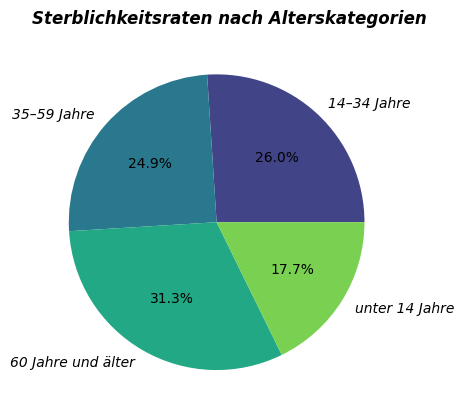

In [50]:
# Erstellung des Kreisdiagramms. Die Variablen wedges, texts, autotexts ermöglichen eine gezielte Stilbearbeitung der Diagrammelemente.
wedges, texts, autotexts = plt.pie(
    x=mortality_by_age['mortality_rate'],
    labels=mortality_by_age.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(mortality_by_age))
)

# Diagrammtitel
plt.title('Sterblichkeitsraten nach Alterskategorien', fontstyle='italic', fontsize='large', loc='left', fontweight='bold', pad=10)

# Stil der Beschriftungen: kursiv
for text in texts:
    text.set_fontstyle('italic')

# Diagramm anzeigen
plt.show()

# ERKLÄRUNG: Die zuvor berechnete mortality_rate gibt den Prozentsatz der Verstorbenen innerhalb jeder einzelnen Alterskategorie an.
# In der unten dargestellten Visualisierung hingegen werden andere Prozentwerte angezeigt, da hier die Sterblichkeit **relativ zur Gesamtzahl aller Passagiere** berechnet wird – die Summe der Anteile ergibt also 100 %.


14. Erweiterte Kreuzanalyse der Sterblichkeit durchgeführt, unter Berücksichtigung folgender Merkmale: Altersgruppe, Ticketklasse, Deckniveau, Anzahl der Familienmitglieder. Mithilfe von Heatmaps wurden die stärksten Einflussfaktoren auf die Sterblichkeit identifiziert und visualisiert.

In [51]:
# Gruppierung nach vier Merkmalen
grouped = titanic.groupby(['age_category', 'pclass', 'deck', 'relatives_count'])['alive'].value_counts().unstack(fill_value=0)

# Zusätzliche Spalten berechnen
grouped['total'] = grouped[True] + grouped[False]
grouped['mortality_rate'] = grouped[False] / grouped['total']

# Nach Sterblichkeitsrate absteigend sortieren und oberste Einträge anzeigen
sorted_group = grouped.sort_values('mortality_rate', ascending=False)
print(sorted_group.head())


alive                                       False  True  total  mortality_rate
age_category   pclass deck relatives_count                                    
14–34 Jahre    1      C    3                    1     0      1             1.0
               3      F    0                    3     0      3             1.0
35–59 Jahre    2      F    2                    1     0      1             1.0
                      E    0                    1     0      1             1.0
unter 14 Jahre 3      G    1                    1     0      1             1.0


/tmp/ipython-input-3440004985.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby(['age_category', 'pclass', 'deck', 'relatives_count'])['alive'].value_counts().unstack(fill_value=0)


/tmp/ipython-input-3741253887.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = titanic.groupby(['age_category', 'pclass', 'deck', 'relatives_count', 'sex'])['alive'].value_counts().unstack(fill_value=0)
/tmp/ipython-input-3741253887.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot2 = grouped.pivot_table(index='age_category', columns='deck', values='mortality_rate', aggfunc='mean')
/tmp/ipython-input-3741253887.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current b

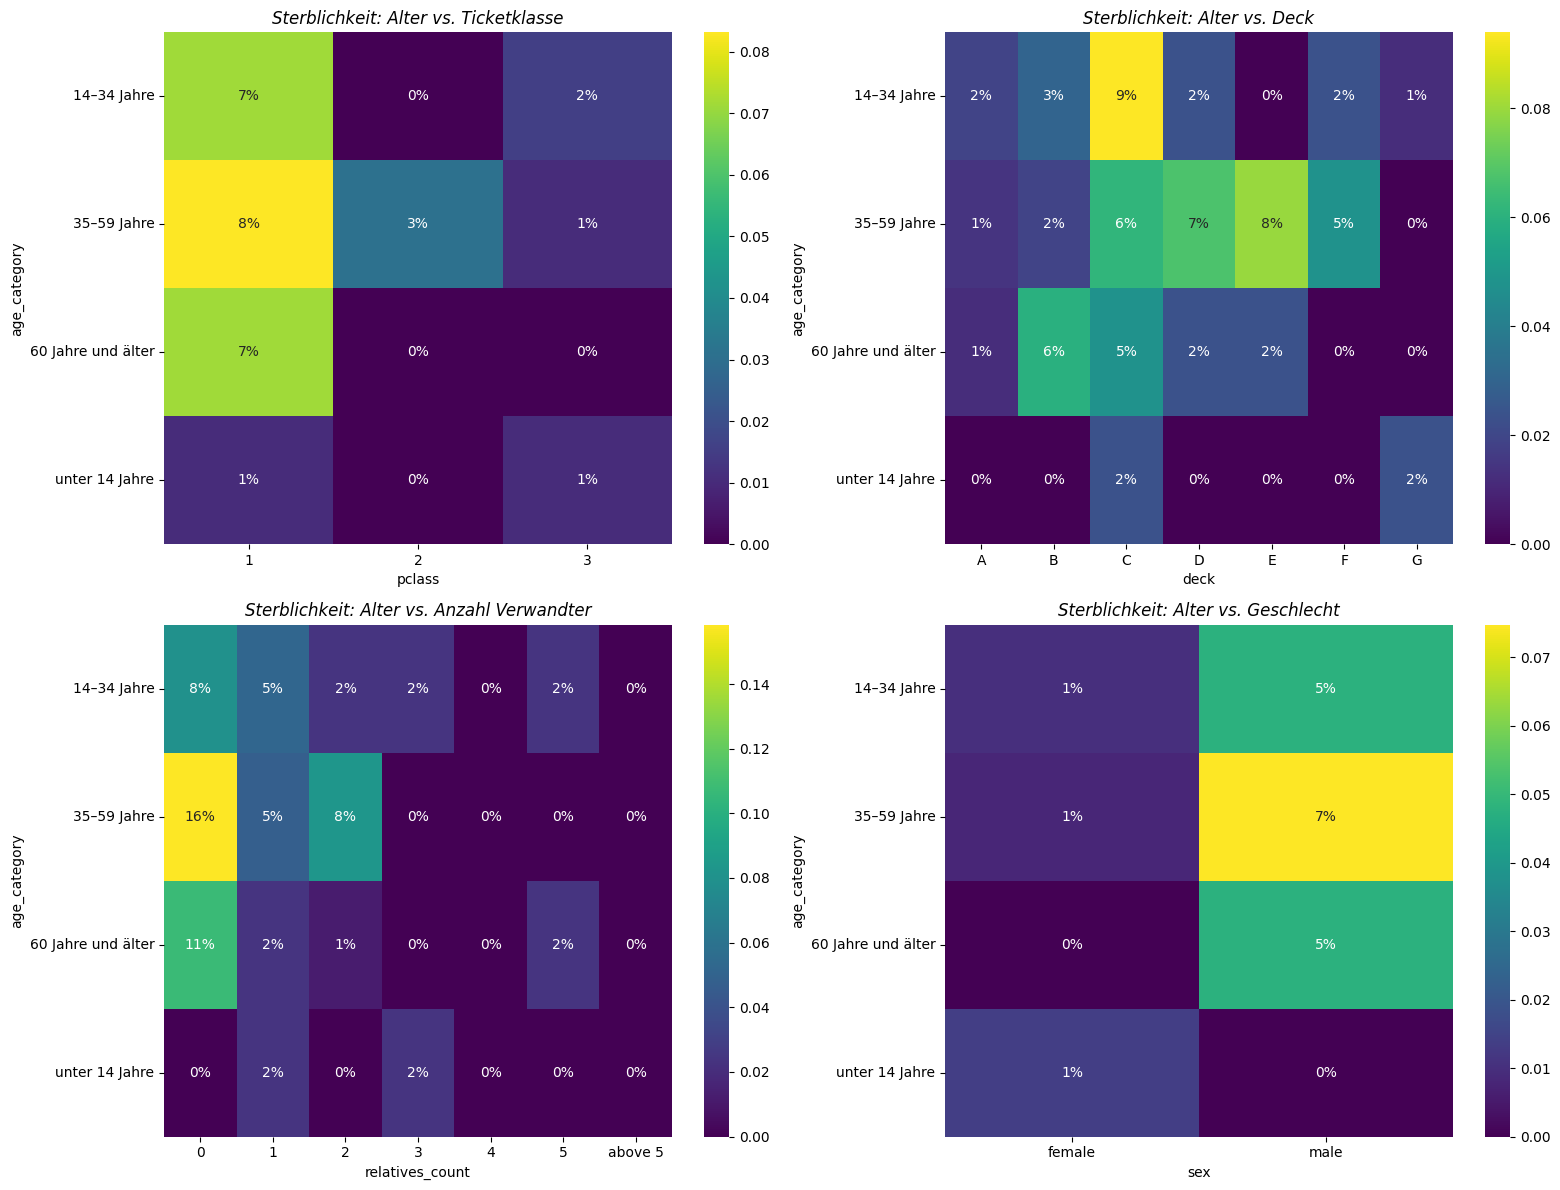

In [52]:
# Visualisierung mithilfe von Heatmaps

# Gruppierung + Berechnung der Sterblichkeitsrate
grouped = titanic.groupby(['age_category', 'pclass', 'deck', 'relatives_count', 'sex'])['alive'].value_counts().unstack(fill_value=0)
grouped['total'] = grouped[True] + grouped[False]

# Absicherung gegen Division durch Null bei leeren Gruppen
grouped['mortality_rate'] = grouped.apply(lambda row: row[False] / row['total'] if row['total'] > 0 else 0, axis=1)
grouped = grouped.reset_index()

# Pivot-Tabellen für vier Heatmaps, aggregiert mit pivot_table
pivot1 = grouped.pivot_table(index='age_category', columns='pclass', values='mortality_rate', aggfunc='mean')
pivot2 = grouped.pivot_table(index='age_category', columns='deck', values='mortality_rate', aggfunc='mean')
pivot3 = grouped.pivot_table(index='age_category', columns='relatives_count', values='mortality_rate', aggfunc='mean')
pivot4 = grouped.pivot_table(index='age_category', columns='sex', values='mortality_rate', aggfunc='mean')

# Erstellung der Heatmaps in einem 2x2-Layout
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

sns.heatmap(pivot1, annot=True, cmap='viridis', fmt='.0%', ax=axs[0, 0])
axs[0, 0].set_title('Sterblichkeit: Alter vs. Ticketklasse', fontstyle='italic')

sns.heatmap(pivot2, annot=True, cmap='viridis', fmt='.0%', ax=axs[0, 1])
axs[0, 1].set_title('Sterblichkeit: Alter vs. Deck', fontstyle='italic')

sns.heatmap(pivot3, annot=True, cmap='viridis', fmt='.0%', ax=axs[1, 0])
axs[1, 0].set_title('Sterblichkeit: Alter vs. Anzahl Verwandter', fontstyle='italic')

sns.heatmap(pivot4, annot=True, cmap='viridis', fmt='.0%', ax=axs[1, 1])
axs[1, 1].set_title('Sterblichkeit: Alter vs. Geschlecht', fontstyle='italic')

plt.tight_layout()
plt.show()

# ERKENNTNISSE:

# 1. Heatmap: Die höchste Sterblichkeit (8 %) tritt bei Passagieren der Altersgruppe 35–59 in der 1. Klasse auf. In der 2. Klasse gab es anteilig die meisten Überlebenden.
# 2. Heatmap: Die höchste Sterblichkeit wurde auf den Decks C, D und E festgestellt. Besonders auffällig ist die hohe Zahl Verstorbener in der Altersgruppe 14–34 auf Deck C.
# 3. Heatmap: Die höchste Sterblichkeit wurde bei Alleinreisenden im Alter von 35–59 Jahren festgestellt. Interessanterweise gab es **keine Todesfälle** bei Personen, die mit mehr als 5 Verwandten reisten. Daraus lässt sich schließen, dass die Anwesenheit von Familienmitgliedern positiv mit dem Überleben korreliert.
# 4. Heatmap: Die Mehrheit der Verstorbenen waren Männer – insbesondere in der Altersgruppe 35–59 Jahre. Alle Frauen über 60 sowie männliche Passagiere unter 14 Jahren konnten gerettet werden.
